In [ ]:
# 예외 처리 try except

try:
    pass # 실행할 코드
except:
    pass # 에러 발생 시 실행할 코드


In [1]:
try:
    result = 28/0 # 에러 시점 이후 실행 X
    print("실행이 안 됨")
except:
    print("0으로 나눌 수 없습니다.")
    

0으로 나눌 수 없습니다.


In [3]:
try:
    x,y=input('숫자 두개를 입력하세요.').split()
except:
    print("값을 잘못 입력하셨습니다.")    

숫자 두개를 입력하세요. ㄱ ㄴ


값을 잘못 입력하셨습니다.


In [4]:
%%time
a=[]
for _ in range(1000):
    a.append((_,_,_))
    
    

Wall time: 0 ns


In [11]:
# 특정 에러마다 분기 처리

x=range(4)
try:
    for i in range(1,3):
        y = 10 / x[i]
except ZeroDivisionError as e: # as 별칭
    print("0으로 나눌 수 없습니다.")
    print(e)
except IndexError as e:
    print("인덱스 에러 발생")
    print(e)
else:
    print("에러 없이 실행되었습니다.")
    

에러 없이 실행되었습니다.


In [ ]:
try:
    x, y = map(int,input().split(' '))
    result = x / y
except ValueError: 
    print("값을 잘못 입력하셨습니다.")
except ZeroDivisionError:
    print("0으로 나눌 수 없습니다.")
else:
    print(result)

In [12]:
try: 
    raise KeyError
finally:
    print("무조건 실행됩니다.") # 에러 발생해도 실행


무조건 실행됩니다.


KeyError: 

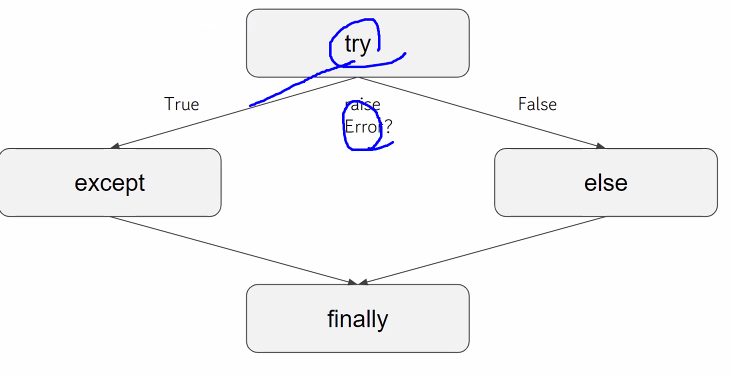

In [13]:
try:
    x, y = map(int,input().split(' '))
    result = x / y
except ValueError: 
    print("값을 잘못 입력하셨습니다.")
except ZeroDivisionError:
    print("0으로 나눌 수 없습니다.")
else:
    print(result)
finally:
    print("프로그램을 종료합니다.")

 12


값을 잘못 입력하셨습니다.
프로그램을 종료합니다.


In [2]:
# API 서버에 통신하기
import requests

response =requests.get('https://api.github.com/repositories',headers={'Accept':'application/vnd.github+json'})
print(response.status_code)


200


In [28]:
# response에 대한 요소 확인
print(f"인코딩: {response.encoding}")
print(f"콘텐츠 타입: {response.headers['Content-Type']}")
print(f"서버: {response.headers['server']}")

인코딩: utf-8
콘텐츠 타입: application/json; charset=utf-8
서버: GitHub.com


In [33]:
# 위에서 확인한 콘텐츠 타입인 json으로 변환 가능

import json
print(json.dumps(response.json()[0],indent=2)[:200])

{
  "id": 1,
  "node_id": "MDEwOlJlcG9zaXRvcnkx",
  "name": "grit",
  "full_name": "mojombo/grit",
  "private": false,
  "owner": {
    "login": "mojombo",
    "id": 1,
    "node_id": "MDQ6VXNlcjE=",



In [ ]:
import requests
response =requests.get('https://api.github.com/search/repositories',
                      params={'q':'data_science+language:python'},
                      headers = {'Accept':'application/vnd.github.v3.text-match+json'})
print(response.status_code)

200


{'next': {'url': 'https://api.github.com/search/repositories?q=data_science%2Blanguage%3Apython&page=2',
  'rel': 'next'},
 'last': {'url': 'https://api.github.com/search/repositories?q=data_science%2Blanguage%3Apython&page=34',
  'rel': 'last'}}

In [6]:

print(response.headers['Content-Type'])


application/json; charset=utf-8


In [24]:
response.json()

100

In [9]:
# json() -> response를 dict타입으로 변경
response.json().keys()

dict_keys(['total_count', 'incomplete_results', 'items'])

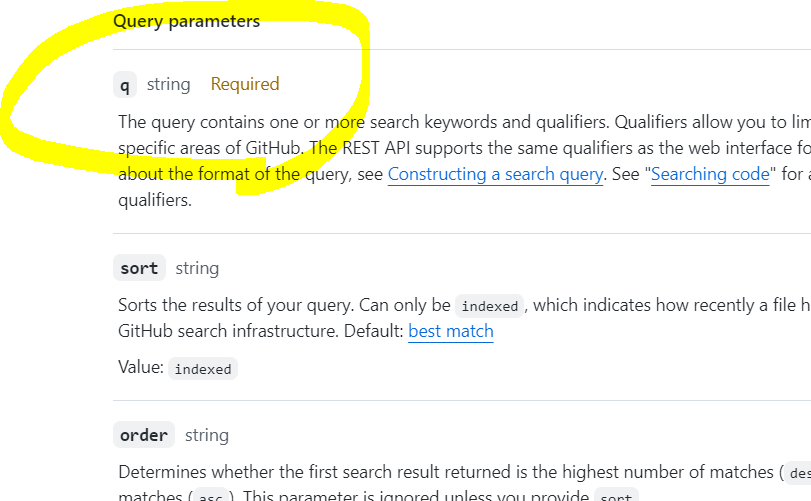

In [10]:
response.json()['items'][0]['text_matches']

[{'object_url': 'https://api.github.com/repositories/26382146',
  'object_type': 'Repository',
  'property': 'description',
  'fragment': 'code for Data Science From Scratch book',
  'matches': [{'text': 'Data Science', 'indices': [9, 21]}]},
 {'object_url': 'https://api.github.com/repositories/26382146',
  'object_type': 'Repository',
  'property': 'name',
  'fragment': 'data-science-from-scratch',
  'matches': [{'text': 'data', 'indices': [0, 4]}]}]

In [1]:
# Github API List Repository Issues
import requests
response=requests.get('https://api.github.com/repos/pytorch/pytorch/issues',
                      headers = {'Accept' : 'application/vnd.github+json'})
print("Response Code:",response.status_code)
print("Numer of comments:",len(response.json()))
# 정상적인 통신이 완료되었으나 일부의 issue만 가져옴

Response Code: 200
Numer of comments: 30


In [37]:
#pagination
response.links # .links -> 응답 페이지 수에 대한 세부 정보

{'next': {'url': 'https://api.github.com/repositories/65600975/issues?page=2',
  'rel': 'next'},
 'last': {'url': 'https://api.github.com/repositories/65600975/issues?page=371',
  'rel': 'last'}}

In [25]:
# 다음 링크가 있다면 API를 호출하는 함수
def get_all_pages(url,params = None ,headers = None):
    output_json = []
    response = requests.get(url,params=params,headers=headers)
    if response.status_code ==200:
        output_json = response.json()
        if 'next' in response.links:
            next_url = response.links['next']['url']
            if next_url is not None:
                output_json += get_all_pages(next_url,params,headers)
                print(n)
                n += 1
    return output_json

In [ ]:
# 재귀 함수의 recursion(스스로 호출) 조정
import sys
sys.setrecursionlimit(10**4)

In [4]:
import pandas as pd

out = get_all_pages(
    "https://api.github.com/repos/pytorch/pytorch/issues/comments",
    params={
        'since': '2022-01-01T10:00:01Z',
        'sorted': 'created',
        'direction': 'desc'
    },
    headers={'Accept' : 'application/vnd.github.v3+json'}
)

df = pd.DataFrame(out)
print(df['body'].count())
df[['id', 'created_at','body']].sample(1)

# Github API의 rate limit으로 인해 실제 데이터보다 적은 양을 가져옴

270


,id,created_at,body
182,1445289879,2023-02-26T07:47:46Z,Getting `Failed to find nvToolsExt` error on w...


In [7]:
# 응답 헤더에서 사용량 조회
response = requests.head('https://api.github.com/repos/pytorch/pytorch/issues/comments')
print('X-Ratelimit-Limit',response.headers['X-Ratelimit-Limit'],'(시간 당 제한)')
print('X-Ratelimit-Remaining',response.headers['X-Ratelimit-Remaining'],'(남은 요청 수)')

# UTC 시간을 일반적인 형식으로 변환
import datetime
print('Rate Limit reset at', datetime.datetime.fromtimestamp(int(response.headers['X-RateLimit-Reset'])).strftime('%c'))

X-Ratelimit-Limit 60 (시간 당 제한)
X-Ratelimit-Remaining 47 (남은 요청 수)
Rate Limit reset at Mon Feb 27 23:03:48 2023


In [8]:
# time 라이브러리의 sleep() 메서드 이용해 API호출 속도 조절
# X-Ratelimit-Reset과 X-Ratelimit-Remaining을 이용해 대기 시간을 구함
from datetime import datetime
import time

def handle_rate_limits(response):
    now = datetime.now()
    reset_time = datetime.fromtimestamp(int(response.headers['X-RateLimit-Reset']))
    remaining_requests = response.headers['x-Ratelimit_Remaining']
    remaining_time = (reset_time - now).total_seconds()
    intervals = remaining_time / (1.0 + int(remaining_requests))
    print('Sleeping for', intervals)
    time.sleep(intervals)
    return True

In [ ]:
# API호출 시의 네트워크 오류를 감안한 코드

from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

retry_strategy = Retry{ 
    total = 3,
    status_forcelist = [500, 503, 504], # 재시도할 상태 코드 목록
    backoff_factor = 1
}
retry_adapter = HTTPAdapter(max_retries=retry_strategy)

http = requests.Session()
http.mount("http://",retry_adapter)

response = http.get('http://api.github.com/seach/repositories',
                    param={'q': 'data_science+language:python'})
for item in response.json()['items'][:5]:
    print(item['name'])